In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.datasets import make_classification
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from math import sqrt

# Data load & cleaning

In [2]:
diamonds = pd.read_csv('./data/diamond_train.csv')

In [3]:
diamonds

,clarity,city,color,cut,x,y,z,depth,table,price,carat
0,VS2,Dubai,J,Premium,6.83,6.79,4.25,62.4,58.0,4268,1.21
1,VS2,Kimberly,H,Very Good,4.35,4.38,2.75,63.0,57.0,505,0.32
2,VS1,Las Vegas,G,Fair,5.62,5.53,3.65,65.5,55.0,2686,0.71
3,SI1,Kimberly,D,Good,4.68,4.72,3.00,63.8,56.0,738,0.41
4,SI1,Dubai,G,Ideal,6.55,6.51,3.95,60.5,59.0,4882,1.02
...,...,...,...,...,...,...,...,...,...,...,...
40450,VS1,Antwerp,G,Ideal,7.10,7.04,4.43,62.7,57.0,10070,1.34
40451,SI2,Madrid,F,Good,8.31,8.25,4.73,57.1,60.0,12615,2.02
40452,SI1,Kimberly,H,Ideal,6.37,6.42,4.01,62.7,56.0,5457,1.01
40453,VS1,Kimberly,J,Ideal,4.45,4.47,2.76,61.9,54.3,456,0.33


In [4]:
diamonds.shape

(40455, 11)

In [5]:
diamonds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   clarity  40455 non-null  object 
 1   city     40455 non-null  object 
 2   color    40455 non-null  object 
 3   cut      40455 non-null  object 
 4   x        40455 non-null  float64
 5   y        40455 non-null  float64
 6   z        40455 non-null  float64
 7   depth    40455 non-null  float64
 8   table    40455 non-null  float64
 9   price    40455 non-null  int64  
 10  carat    40455 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 3.4+ MB


In [6]:
diamonds.describe()

,x,y,z,depth,table,price,carat
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,5.729392,5.732819,3.537154,61.752841,57.446133,3928.444469,0.797706
std,1.124453,1.146650,0.697062,1.431725,2.233535,3992.416147,0.475544
min,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.200000
25%,4.710000,4.720000,2.910000,61.000000,56.000000,945.000000,0.400000
50%,5.690000,5.710000,3.520000,61.800000,57.000000,2397.000000,0.700000
75%,6.540000,6.540000,4.035000,62.500000,59.000000,5331.000000,1.040000
max,10.230000,58.900000,8.060000,79.000000,95.000000,18823.000000,4.500000


In [7]:
diamonds.dtypes

clarity     object
city        object
color       object
cut         object
x          float64
y          float64
z          float64
depth      float64
table      float64
price        int64
carat      float64
dtype: object

# Pre-processing & EDA

In [8]:
diamonds_encoded = pd.get_dummies(diamonds, columns=['clarity', 'city', 'color', 'cut'])


X = diamonds_encoded.drop('price', axis=1)
y = diamonds_encoded['price']

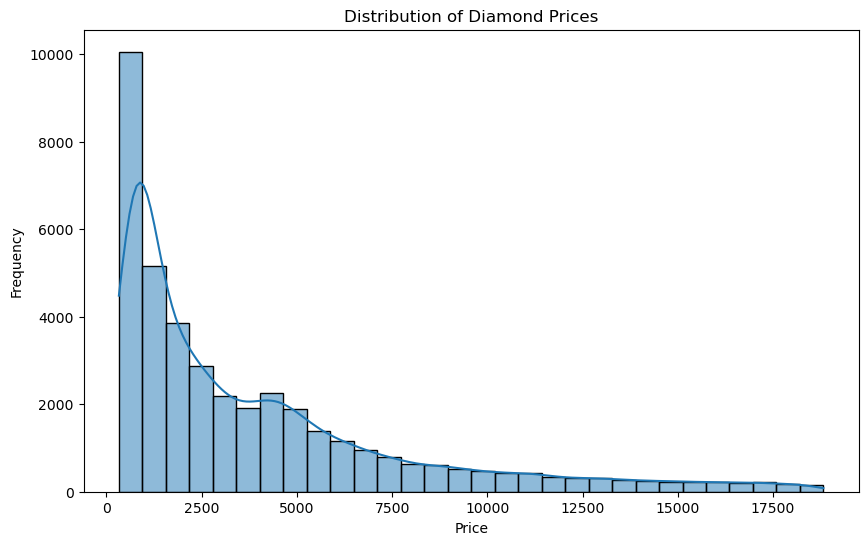

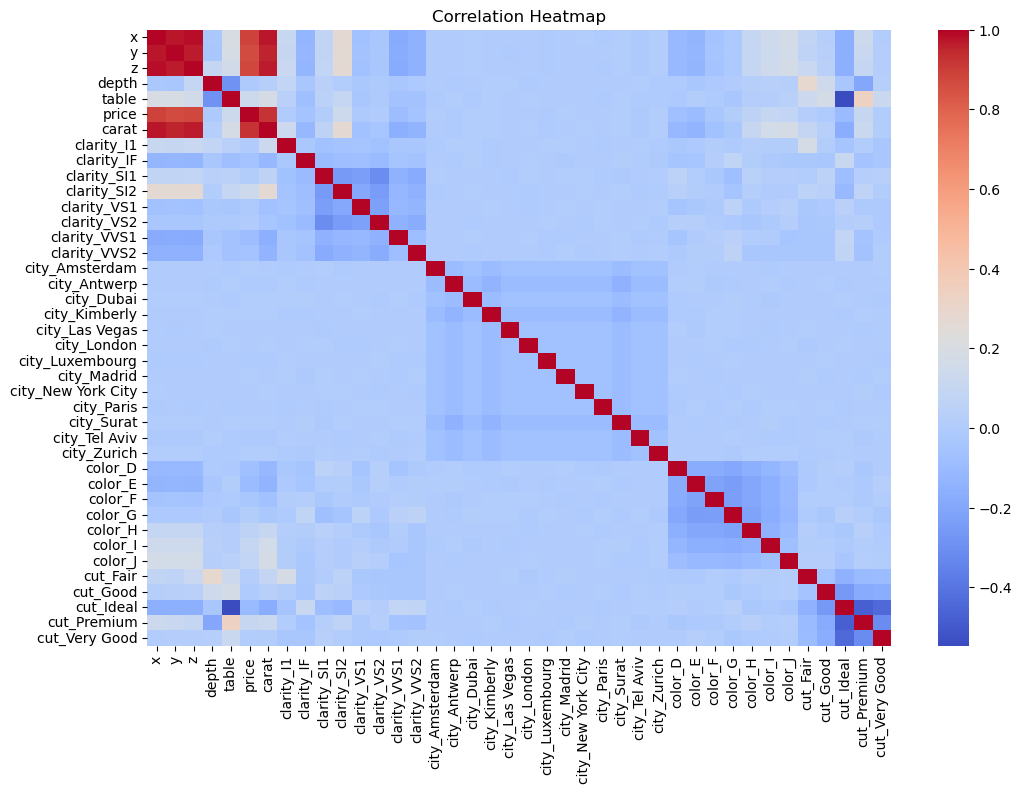

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.histplot(data=diamonds_encoded, x='price', bins=30, kde=True)
plt.title('Distribution of Diamond Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(diamonds_encoded.corr(), cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# Featuring Engineering

In [10]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Model Selection

In [11]:
linear_reg_model = LinearRegression()
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)


linear_reg_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Model Evaluation

In [12]:
linear_reg_pred = linear_reg_model.predict(X_test)
random_forest_pred = random_forest_model.predict(X_test)

#Linear Regression
linear_reg_mae = mean_absolute_error(y_test, linear_reg_pred)
linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)
linear_reg_rmse = sqrt(linear_reg_mse)  # Calculate RMSE
linear_reg_r2 = r2_score(y_test, linear_reg_pred)

print("Linear Regression Model:")
print("Mean Absolute Error (MAE):", linear_reg_mae)
print("Mean Squared Error (MSE):", linear_reg_mse)
print("Root Mean Squared Error (RMSE):", linear_reg_rmse)
print("R-squared (R2) Score:", linear_reg_r2)
print()

# Random Forest
random_forest_mae = mean_absolute_error(y_test, random_forest_pred)
random_forest_mse = mean_squared_error(y_test, random_forest_pred)
random_forest_rmse = sqrt(random_forest_mse)  # Calculate RMSE
random_forest_r2 = r2_score(y_test, random_forest_pred)

print("Random Forest Regression Model:")
print("Mean Absolute Error (MAE):", random_forest_mae)
print("Mean Squared Error (MSE):", random_forest_mse)
print("Root Mean Squared Error (RMSE):", random_forest_rmse)
print("R-squared (R2) Score:", random_forest_r2)


Linear Regression Model:
Mean Absolute Error (MAE): 745.1181884104877
Mean Squared Error (MSE): 1265299.6336762698
Root Mean Squared Error (RMSE): 1124.8553834499214
R-squared (R2) Score: 0.9223017804520159

Random Forest Regression Model:
Mean Absolute Error (MAE): 277.5120440946535
Mean Squared Error (MSE): 317053.92490032874
Root Mean Squared Error (RMSE): 563.0754167075036
R-squared (R2) Score: 0.9805306784181378


In [13]:
# RMSE has better results on Random Forest than Linear Regression

# Model Deployment

In [14]:
test_data = pd.read_csv('./data/diamonds_test.csv')

test_data. info()
test_data_encoded = pd.get_dummies(test_data, columns=['cut', 'color', 'clarity', 'city'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13485 entries, 0 to 13484
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       13485 non-null  int64  
 1   carat    13485 non-null  float64
 2   cut      13485 non-null  object 
 3   color    13485 non-null  object 
 4   clarity  13485 non-null  object 
 5   depth    13485 non-null  float64
 6   table    13485 non-null  float64
 7   x        13485 non-null  float64
 8   y        13485 non-null  float64
 9   z        13485 non-null  float64
 10  city     13485 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.1+ MB


In [15]:
missing_cols = set(X.columns) - set(test_data_encoded.columns)
for c in missing_cols:
    test_data_encoded[c] = 0
test_data_encoded = test_data_encoded[X.columns]

new_predictions = random_forest_model.predict(test_data_encoded)

test_data['price'] = new_predictions
test_data

/Users/anaaguiar/miniconda3/envs/m3-env/lib/python3.12/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


,id,carat,cut,color,clarity,depth,table,x,y,z,city,price
0,0,0.79,Very Good,F,SI1,62.7,60.0,5.82,5.89,3.67,Amsterdam,16016.06
1,1,1.20,Ideal,J,VS1,61.0,57.0,6.81,6.89,4.18,Surat,17071.02
2,2,1.57,Premium,H,SI1,62.2,61.0,7.38,7.32,4.57,Kimberly,15795.82
3,3,0.90,Very Good,F,SI1,63.8,54.0,6.09,6.13,3.90,Kimberly,15823.85
4,4,0.50,Very Good,F,VS1,62.9,58.0,5.05,5.09,3.19,Amsterdam,15913.41
...,...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.57,Ideal,E,SI1,61.9,56.0,5.35,5.32,3.30,Amsterdam,15749.93
13481,13481,0.71,Ideal,I,VS2,62.2,55.0,5.71,5.73,3.56,New York City,15627.92
13482,13482,0.70,Ideal,F,VS1,61.6,55.0,5.75,5.71,3.53,Tel Aviv,15790.01
13483,13483,0.70,Very Good,F,SI2,58.8,57.0,5.85,5.89,3.45,Surat,15786.22


In [16]:
data_to_deliver = test_data.drop(['carat', 'cut', 'color', 'clarity','depth', 'table', 'x', 'y', 'z', 'city'], axis=1)
data_to_deliver

,id,price
0,0,16016.06
1,1,17071.02
2,2,15795.82
3,3,15823.85
4,4,15913.41
...,...,...
13480,13480,15749.93
13481,13481,15627.92
13482,13482,15790.01
13483,13483,15786.22


In [17]:
data_to_deliver.to_csv('./delivery/price_delivery4.csv', index=False) 